<a href="https://colab.research.google.com/github/selvatharrun/DSI/blob/main/DL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your dataset
train_data_dir = '/content/drive/MyDrive/deep learning /catsAndDogs40/train'

# Image dimensions and batch size
img_width, img_height = 227, 227
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')  # Assuming you have two classes (cats and dogs)

# Define the AlexNet model
model = Sequential()

# Layer 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 4
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 5
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10) # Adjust epochs as needed



Found 64 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.4688 - loss: 1.2966
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step - accuracy: 0.5000 - loss: 0.9143
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.4062 - loss: 0.6956
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 6s/step - accuracy: 0.4896 - loss: 0.6934
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step - accuracy: 0.5104 - loss: 0.6938
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step - accuracy: 0.5000 - loss: 0.6931
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5104 - loss: 0.6930
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.4688 - loss: 0.6933
Epoch 9/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.5104 - loss: 0.6927
Epoch 10/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.5625 - loss: 0.6918


In [ ]:
# prompt: perform alexnet, and use this for training "/content/drive/MyDrive/deep learning /catsAndDogs40/train"  and this as validation dataset "/content/drive/MyDrive/deep learning /catsAndDogs40/test"

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define the path to your dataset
train_data_dir = '/content/drive/MyDrive/deep learning /catsAndDogs40/train'
validation_data_dir = '/content/drive/MyDrive/deep learning /catsAndDogs40/test'

# Image dimensions and batch size
img_width, img_height = 227, 227
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')  # Assuming you have two classes (cats and dogs)

# Data augmentation for validation
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Define the AlexNet model
model = Sequential()

# Layer 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 2
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Layer 3
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 4
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

# Layer 5
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator,
          epochs=10,  # Adjust epochs as needed
          validation_data=validation_generator)


Found 64 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 10s/step - accuracy: 0.5208 - loss: 2.3993 - val_accuracy: 0.5000 - val_loss: 1.4179
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 8s/step - accuracy: 0.5104 - loss: 1.0515 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 8s/step - accuracy: 0.4896 - loss: 0.6944 - val_accuracy: 0.5000 - val_loss: 0.6916
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step - accuracy: 0.5208 - loss: 0.7060 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.5208 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step - accuracy: 0.5208 - loss: 0.6973 - val_accuracy: 0.5000 - val_loss: 0.6942
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 8s/step - accuracy: 0.5312 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 8s/step - a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Prediction: Cat


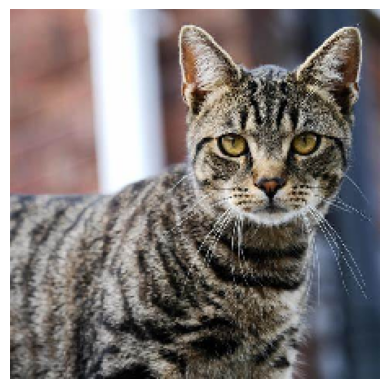

In [ ]:
# prompt: open this photo "/content/drive/MyDrive/deep learning /catsAndDogs40/test/cat/7.jpg" ,and then predict this photo using the model

import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/deep learning /catsAndDogs40/OIP.jpg'
img = image.load_img(img_path, target_size=(227, 227))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

prediction = model.predict(img_tensor)

if prediction[0][0] > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")

plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
#i was here.